In [57]:
# Importar las librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from pandas_profiling import ProfileReport

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

In [58]:
traindata = pd.read_csv('dataset_train.csv')
testdata = pd.read_csv('dataset_test.csv')

Text(0.5, 1.0, 'Agrupando resultados de Clase defaulted_loan')

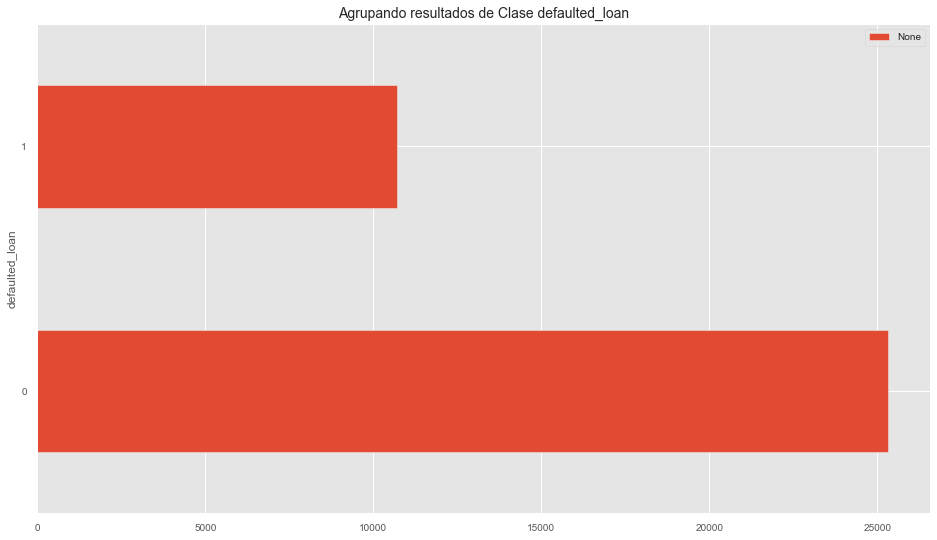

In [102]:
#Agrupar los datos de la clase (defaulted_loan) del dataset de entrenamiento
#Se observa que 25305 clientes realizaron el pago de sus creditos
#Se observa que 10695 clientes no realizaron el pago de sus creditos
dl = traindata.groupby('defaulted_loan').size()
dl.plot(kind='barh', legend='Reverse')
plt.title(u'Agrupando resultados de Clase defaulted_loan', size = 14.0)

Text(0.5, 1.0, 'Agrupando Proveedores de tarjeta de credito')

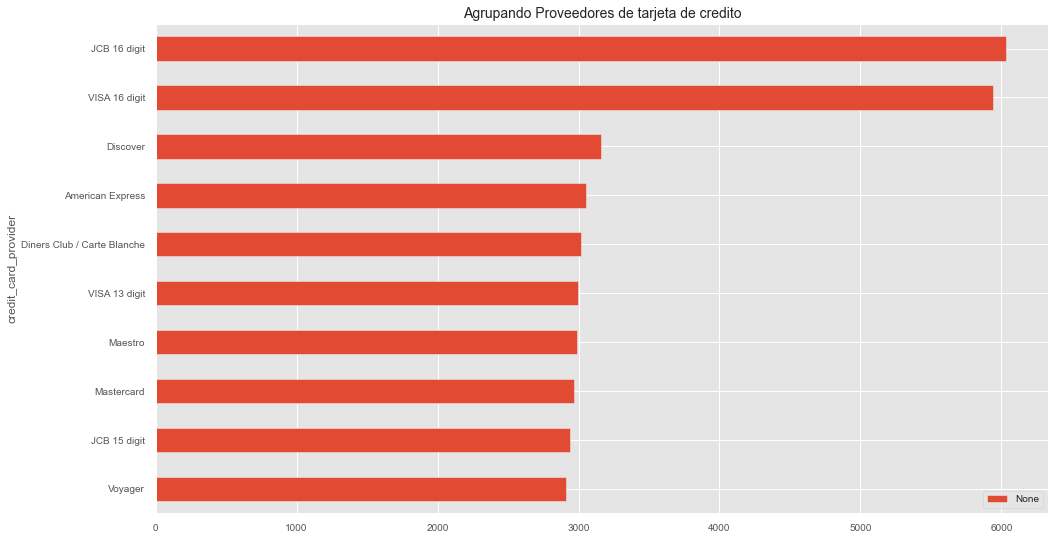

In [103]:
#Se realiza un pequeño analisis agrupando atributos no numericos
#para obtener alguno tipo de relacion con el analisis exploratorio
ccp = traindata.groupby('credit_card_provider').size().sort_values()
ccp.plot(kind='barh', legend='Reverse')
plt.title(u'Agrupando Proveedores de tarjeta de credito', size = 14.0)

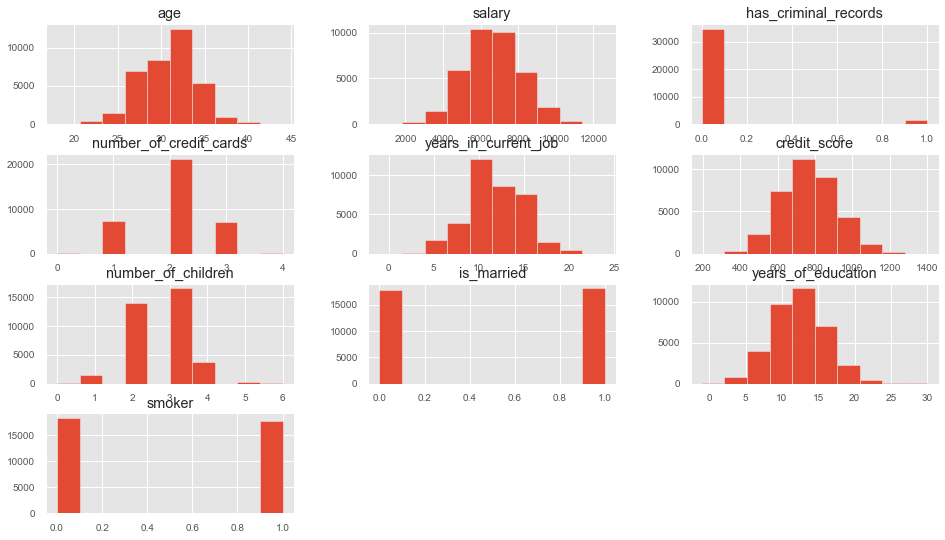

In [59]:
#Obtener la frecuencia de las variables a trabajar
traindata.drop(['car_licence_plate','credit_card_provider','company','application_date','name','phone_number','email_domain','current_job','credit_card_expire','credit_card_number','address','application_id','defaulted_loan'], axis=1).hist()
plt.show()

In [60]:
traindata.shape

(36000, 23)

In [61]:
testdata.shape

(24000, 22)

In [62]:
traindata.describe()

age        salary  has_criminal_records  \
count  36000.000000  36000.000000          36000.000000   
mean      30.684639   6654.306222              0.035944   
std        3.121985   1499.670451              0.186154   
min       18.000000    618.000000              0.000000   
25%       29.000000   5616.000000              0.000000   
50%       31.000000   6618.000000              0.000000   
75%       33.000000   7667.250000              0.000000   
max       44.000000  12612.000000              1.000000   

       number_of_credit_cards  years_in_current_job  credit_score  \
count            36000.000000          36000.000000  36000.000000   
mean                 1.998611             11.550639    766.769889   
std                  0.669004              3.107515    149.875122   
min                  0.000000             -1.000000    194.000000   
25%                  2.000000              9.000000    664.000000   
50%                  2.000000             12.000000    763.000000   
75%                  2.000000             14.000000    867.000000   
max                  4.000000             24.000000   1402.000000   

       number_of_children    is_married  years_of_education        smoker  \
count        36000.000000  36000.000000        36000.000000  36000.000000   
mean             2.649528      0.502917           12.376556      0.493028   
std              0.761608      0.499998            3.543147      0.499958   
min              0.000000      0.000000           -1.000000      0.000000   
25%              2.000000      0.000000           10.000000      0.000000   
50%              3.000000      1.000000           12.000000      0.000000   
75%              3.000000      1.000000           15.000000      1.000000   
max              6.000000      1.000000           30.000000      1.000000   

       credit_card_number  defaulted_loan  
count        3.600000e+04    36000.000000  
mean         2.122403e+20        0.297083  
std          2.225968e+20        0.456980  
min          6.040030e+10        0.000000  
25%          3.050000e+18        0.000000  
50%          8.700000e+19        0.000000  
75%          4.320000e+20        1.000000  
max          6.010000e+20        1.000000

In [77]:
profile = ProfileReport(traindata,title='Analisis Exploratorio dataset de entrenamiento',html = {'style':{'full_width':True}})
profile

In [63]:
x=traindata.drop(['car_licence_plate','credit_card_provider','company','application_date','name','phone_number','email_domain','current_job','credit_card_expire','credit_card_number','address','application_id','defaulted_loan',], axis=1)
y=traindata['defaulted_loan']

best=SelectKBest(k='all')
X_new = best.fit_transform(x, y)
X_new.shape
selected = best.get_support(indices=True)
print(x.columns[selected])

Index(['age', 'salary', 'has_criminal_records', 'number_of_credit_cards',
       'years_in_current_job', 'credit_score', 'number_of_children',
       'is_married', 'years_of_education', 'smoker'],
      dtype='object')


<AxesSubplot:title={'center':'Coeficiente de correlacion de Pearson'}>

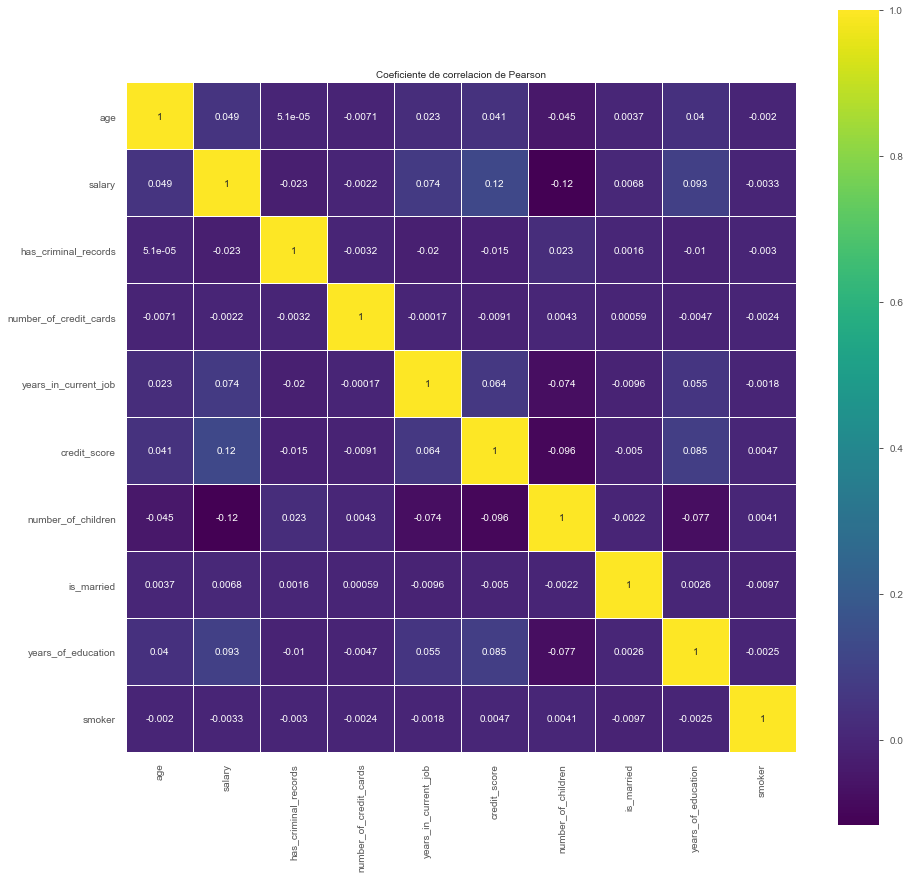

In [64]:
used_features =x.columns[selected]
 
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Coeficiente de correlacion de Pearson', y=1, size=10)
sb.heatmap(traindata[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [78]:
print("Gaussian Naive Bayes")

X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=10)

# Instancias el clasificador
gnb = GaussianNB()
# clasificador de entrenamiento
gnb.fit(X_train,y_train)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Gaussian Naive Bayes
Precisión en el set de Entrenamiento: 0.81
Precisión en el set de Test: 0.81


In [79]:
kf = KFold(n_splits=5)
clf = LogisticRegression()
y_train.shape
clf.fit(X_train, y_train)
score = clf.score(X_train,y_train)
 
print("Metrica del modelo", score)
scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())
preds = clf.predict(X_test)
score_pred = metrics.accuracy_score(y_test, preds)
print("Metrica en Test", score_pred)

C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

Metrica del modelo 0.7813541666666667


C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

Metricas cross_validation [0.77378472 0.78350694 0.79305556 0.78871528 0.79236111]
Media de cross_validation 0.7862847222222221
Metrica en Test 0.785


C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [85]:
#Definir variable xTest para los atributos del dataset_test
xTest=testdata.drop(['car_licence_plate','credit_card_provider','company','application_date','name','phone_number','email_domain','current_job','credit_card_expire','credit_card_number','address','application_id'], axis=1)

#Generar la prediccion a partir del dataset_test
predict = gnb.predict(xTest)
predict = pd.DataFrame(predict,columns=['default_loan'])
predict

default_loan
0                 1
1                 0
2                 1
3                 1
4                 0
...             ...
23995             0
23996             1
23997             0
23998             0
23999             1

[24000 rows x 1 columns]

In [86]:
#Obtener solo la columna de application_id
appId = pd.DataFrame(testdata['application_id'],columns=['application_id'])
appId

application_id
0      RUWM2049266950699
1      ABXL7467194767600
2      CMRX9833260333404
3      FXNE1359007341856
4      WHZG3090814216827
...                  ...
23995  FGXN3101865811284
23996  WXIS2747015505897
23997  ULYM3716005603550
23998  LZXX6745046358460
23999  IINW9734994350222

[24000 rows x 1 columns]

In [87]:
#Concatenar el application_id con los resultados de prediccion
datatest = pd.concat([appId,predict],axis=1)
datatest

application_id  default_loan
0      RUWM2049266950699             1
1      ABXL7467194767600             0
2      CMRX9833260333404             1
3      FXNE1359007341856             1
4      WHZG3090814216827             0
...                  ...           ...
23995  FGXN3101865811284             0
23996  WXIS2747015505897             1
23997  ULYM3716005603550             0
23998  LZXX6745046358460             0
23999  IINW9734994350222             1

[24000 rows x 2 columns]

In [88]:
#Exportar el archivo csv (resultado)
datatest.to_csv('CarlosMojica_01-09-2020_PF_Proy_final_machine_learning.csv',index=False)

In [50]:
# Validaciones extras (dominios de correo electronico)
print(traindata.groupby('email_domain').size())

email_domain
gmail.com      12146
hotmail.com    11829
yahoo.com      12025
dtype: int64


In [51]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_licence_plate       36000 non-null  object 
 1   age                     36000 non-null  float64
 2   credit_card_provider    36000 non-null  object 
 3   salary                  36000 non-null  int64  
 4   has_criminal_records    36000 non-null  int64  
 5   company                 36000 non-null  object 
 6   number_of_credit_cards  36000 non-null  int64  
 7   application_date        36000 non-null  object 
 8   years_in_current_job    36000 non-null  int64  
 9   credit_score            36000 non-null  int64  
 10  phone_number            36000 non-null  object 
 11  number_of_children      36000 non-null  int64  
 12  is_married              36000 non-null  int64  
 13  name                    36000 non-null  object 
 14  email_domain            36000 non-null

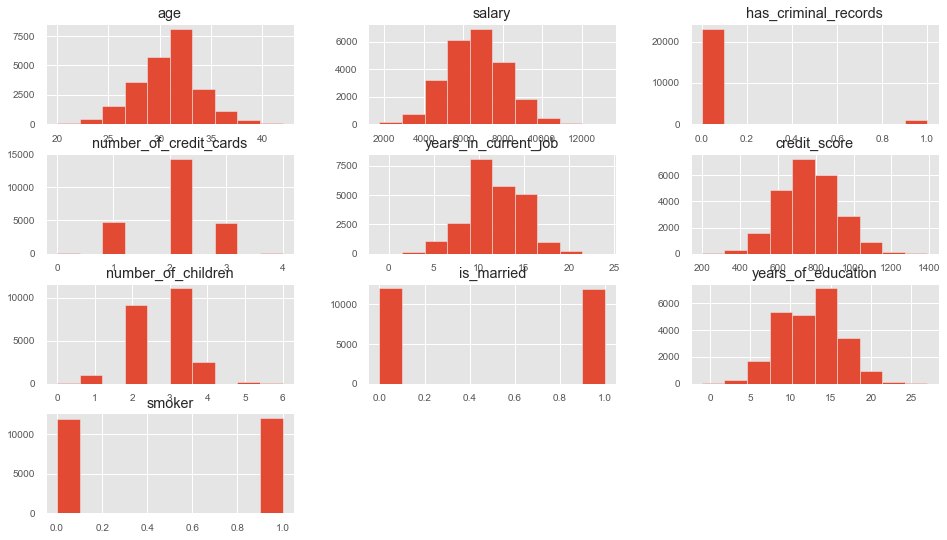

In [105]:
#Validando frecuencia de los atributos a trabajar del dataset_test
prueba = testdata.drop(['car_licence_plate','credit_card_provider','company','application_date','name','phone_number','email_domain','current_job','credit_card_expire','credit_card_number','address','application_id'], axis=1).hist()